In [1]:
# -*- coding: utf-8 -*-

# Author: Xiaopeng Pan
# ID: 1129446
# Purpose: Assignment 3
# Date: August 5, 2020

# import basic packages
import numpy as np
import matplotlib.pyplot as plt
import os                   # to list the images
import shutil               # to remove the folder that holds the resized images
from PIL import Image       # to resize the 64 x 64 images to 32 x 32
from pprint import pprint   # to print parameters of the model
import pickle               # to save and load pickle files

# import sklearn packages 
from sklearn.model_selection import train_test_split      # to split the whole dataset to train and test
from sklearn.model_selection import StratifiedKFold       # to train the CNN model by cross validation
from sklearn.neighbors import KNeighborsClassifier        # to create the KNN model
from sklearn.ensemble import RandomForestClassifier       # to create the RF model
from sklearn.model_selection import RandomizedSearchCV    # to use random search
from sklearn.model_selection import GridSearchCV          # to use grid search

# to evaluate the performance
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

# import keras package to create the CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras import optimizers

import warnings   # to disable warning
warnings.filterwarnings('ignore')     

**Task 1**  
Load the dataset for all three classes and resize each image to (32 x 32). Apply the required pre-processing steps to employ the data into Machine Learning / Deep Learning algorithms.

In [2]:
# set the paths of datasets
dataset_root_path = './DS'
dataset_resized_path = './DS/resized'

# if the resized folder exists, remove it
if os.path.exists(dataset_resized_path):
    shutil.rmtree(dataset_resized_path)
    print(dataset_resized_path + " is removed.")

# get the list of images 
file_list = os.listdir(dataset_root_path)

# create the resized folder 
os.mkdir(dataset_resized_path)
print(dataset_resized_path + " is created.")

# resize all the images to 32 x 32 and save them to the resized folder 
for file_name in file_list:
    img = Image.open(dataset_root_path + "/" + file_name)
    img_resized = img.resize((32,32))
    img_resized.save(dataset_resized_path + "/" + file_name)
    
print("Images have been resized to 32 x 32 and saved to "+ dataset_resized_path)

./DS/resized is removed.
./DS/resized is created.
Images have been resized to 32 x 32 and saved to ./DS/resized


In [3]:
# generate the dataset to be processed
X = np.zeros((1500,32,32,3),dtype=np.int32)
Y = np.zeros((1500,1),dtype=np.int32)

file_index = 0
for file_name in file_list:
    img_path = dataset_resized_path + "/" + file_name
    img = image.load_img(img_path, target_size=(32, 32))
    img_value = image.img_to_array(img)
    img_value = np.expand_dims(img_value, axis=0)
    X[file_index] = img_value # assign image attribute values to X array
    if "Abdomen" in file_name:
        Y[file_index] = 0 # assign class values to y array
    elif "Chest" in file_name:
        Y[file_index] = 1
    elif "Head" in file_name:
        Y[file_index] = 2
    file_index = file_index + 1
print(file_index,"images have been processed ")
print("\nAttributes are: ",X.dtype,"\n",X)
print("\nLabels are: ",Y.dtype,"\n",Y)

1500 images have been processed 

Attributes are:  int32 
 [[[[100 100 100]
   [100 100 100]
   [101 101 101]
   ...
   [100 100 100]
   [102 102 102]
   [102 102 102]]

  [[105 105 105]
   [103 103 103]
   [100 100 100]
   ...
   [101 101 101]
   [100 100 100]
   [ 99  99  99]]

  [[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [100 100 100]
   [ 99  99  99]
   [ 98  98  98]]

  ...

  [[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [ 99  99  99]
   [ 99  99  99]
   [ 99  99  99]]

  [[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [100 100 100]
   [100 100 100]
   [100 100 100]]

  [[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [101 101 101]
   [102 102 102]
   [103 103 103]]]


 [[[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[101 101 101]
   [101 101 101]
   [101 101 101]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[101 101 101]
   [101 101 101]
   [101 10

In [4]:
# dataset splitting 
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=47)
# show the train and test datasets for both X and Y after splitting
print("\nxTrain =\n",xTrain)
print("\nxTest=\n",xTest)
print("\nyTrain=\n",yTrain)
print("\nyTest=\n",yTest)


xTrain =
 [[[[ 96  96  96]
   [ 98  98  98]
   [102 102 102]
   ...
   [ 98  98  98]
   [ 99  99  99]
   [101 101 101]]

  [[106 106 106]
   [103 103 103]
   [100 100 100]
   ...
   [101 101 101]
   [100 100 100]
   [100 100 100]]

  [[104 104 104]
   [102 102 102]
   [ 99  99  99]
   ...
   [104 104 104]
   [102 102 102]
   [100 100 100]]

  ...

  [[102 102 102]
   [102 102 102]
   [101 101 101]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[102 102 102]
   [102 102 102]
   [102 102 102]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[102 102 102]
   [102 102 102]
   [102 102 102]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]]


 [[[ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]
   ...
   [ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]
   ...
   [ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]
   ...
   [ 25  25  25]
   [ 25  25  25]


**Task 2**  
Construct a Convolutional Neural Network (CNN) architecture to extract features from the images. (HINT: Extract features for train and test set separately. Extract the features constructed by the convolutional layers from an intermediate dense layer.)

In [5]:
# define the CNN model 
img_rows = 32
img_cols = 32
channel_number = 3
activation_function='relu'

def getModel():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = (3, 3), activation=activation_function, input_shape=(img_rows, img_cols, channel_number)))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3,3), activation=activation_function))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

model_cnn = getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [6]:
# Train the CNN model with Cross Validation
epochs=10
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(xTrain, yTrain)
foldNum=0
for train_index, val_index in skf.split(xTrain, yTrain):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X.reshape(X.shape[0],32,32,3)[train_index], X.reshape(X.shape[0],32,32,3)[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    Y_train = to_categorical(Y_train, 3)
    Y_val = to_categorical(Y_val, 3)

    history = model_cnn.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs,
                        batch_size=1
                        )  

Results for fold 1
Epoch 1/10
960/960 [==============================] - 11s 12ms/step - loss: 1.5829 - accuracy: 0.8021 - val_loss: 0.0458 - val_accuracy: 0.9833
Epoch 2/10
960/960 [==============================] - 15s 16ms/step - loss: 0.5540 - accuracy: 0.9594 - val_loss: 0.2124 - val_accuracy: 0.9667
Epoch 3/10
960/960 [==============================] - 15s 16ms/step - loss: 0.7168 - accuracy: 0.9563 - val_loss: 0.6625 - val_accuracy: 0.9625
Epoch 4/10
960/960 [==============================] - 15s 16ms/step - loss: 0.5890 - accuracy: 0.9792 - val_loss: 0.2279 - val_accuracy: 0.9917
Epoch 5/10
960/960 [==============================] - 15s 16ms/step - loss: 0.7535 - accuracy: 0.9563 - val_loss: 0.2407 - val_accuracy: 0.9792
Epoch 6/10
960/960 [==============================] - 15s 15ms/step - loss: 0.2856 - accuracy: 0.9854 - val_loss: 0.0395 - val_accuracy: 0.9958
Epoch 7/10
960/960 [==============================] - 15s 15ms/step - loss: 0.6674 - accuracy: 0.9698 - val_loss: 0.3

In [7]:
# extract features for train and test datasets
features_extractor = keras.Model(inputs=model_cnn.inputs,
                        outputs=model_cnn.layers[9].output) # the features are taken from output of layers[9]
features_xTrain = features_extractor(xTrain)
features_xTest = features_extractor(xTest)

print("Features of the Train dataset are:",len(features_xTrain),"x",len(features_xTrain[0]))
print(features_xTrain)
print("Features of the Test dataset are:",len(features_xTest),"x",len(features_xTest[0]))
print(features_xTest)

Features of the Train dataset are: 1200 x 64
tf.Tensor(
[[ 28.552565   0.         0.       ...   0.         0.         0.      ]
 [ 61.33877    0.         0.       ... 667.88214    0.         0.      ]
 [110.06753    0.         0.       ...   0.         0.         0.      ]
 ...
 [152.26851    0.         0.       ... 724.10803    0.         0.      ]
 [ 70.454025   0.         0.       ...   0.         0.         0.      ]
 [ 57.47207    0.         0.       ... 671.68115    0.         0.      ]], shape=(1200, 64), dtype=float32)
Features of the Test dataset are: 300 x 64
tf.Tensor(
[[ 68.461044   0.         0.       ... 406.19528    0.         0.      ]
 [ 54.712166   0.         0.       ...  59.864754   0.         0.      ]
 [ 85.70481    0.         0.       ... 154.24258    0.         0.      ]
 ...
 [ 74.266365   0.         0.       ...   0.         0.         0.      ]
 [ 41.729366   0.         0.       ... 448.75974    0.         0.      ]
 [ 87.46386    0.         0.       ... 172

**Task 3**  
Apply the K-Nearest Neighbor (KNN) algorithm to the extracted features from CNN and find the optimal value of K. The value of K can be considered as [3, 5, 7, 9]. Determine the performance of the model using an appropriate performance metric. Draw a graph of K values and their corresponding performance in order to represent your results.

Number of Abdomen images: 102
Number of Chest images: 105
Number of Head images: 93

For K = 3
Accuracy = 0.9966666666666667
Confusion Matrix =
 [[102   0   0]
 [  0 105   0]
 [  0   1  92]]
For K = 5
Accuracy = 0.9933333333333333
Confusion Matrix =
 [[102   0   0]
 [  0 105   0]
 [  1   1  91]]
For K = 7
Accuracy = 0.9933333333333333
Confusion Matrix =
 [[102   0   0]
 [  0 105   0]
 [  1   1  91]]
For K = 9
Accuracy = 0.9933333333333333
Confusion Matrix =
 [[102   0   0]
 [  0 105   0]
 [  1   1  91]]


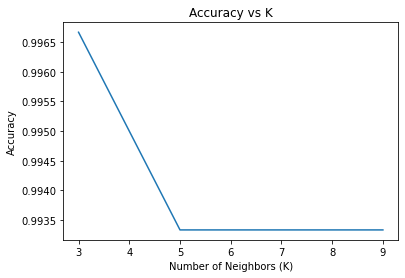

In [8]:
# define the train and test datasets for KNN
xTrain_knn = features_xTrain.numpy()
yTrain_knn = yTrain.reshape(-1)
xTest_knn = features_xTest.numpy()
yTest_knn = yTest.reshape(-1)

# for each class, print the number of images in the test set 
num_Abdomen = 0
num_Chest = 0
num_Head = 0

for y in yTest_knn:
    if y==0:
        num_Abdomen+=1
    elif y==1:
        num_Chest+=1
    elif y==2:
        num_Head+=1
print("Number of Abdomen images:",num_Abdomen)
print("Number of Chest images:",num_Chest)
print("Number of Head images:",num_Head)
print()

# define the K values and accuracy values
K=[3,5,7,9]
accuracy_knn=[]

for k in K:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(xTrain_knn, yTrain_knn)
    
    # save the model to pickle file
    pkl_filename = "Xiaopeng Pan_1129446_knn_k_"+str(k)+".pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model_knn, file)
    
    # Load the model from pickle file
    with open(pkl_filename, 'rb') as file:
        pickle_model_knn = pickle.load(file)
    prediction_knn= pickle_model_knn.predict(xTest_knn)
    
    # print the performance evaluation
    print("For K =",k)
    print("Accuracy =",accuracy_score(yTest_knn, prediction_knn))
    print("Confusion Matrix =\n",confusion_matrix(yTest_knn, prediction_knn))
    accuracy_knn.append(accuracy_score(yTest_knn, prediction_knn))

# plot the performance graph
plt.plot(K,accuracy_knn)
plt.title('Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()   

**Task 4**  
Apply Random Forest (RF) algorithm to the extracted features from CNN. Tune at least two hyperparameters using random search. Determine the model's optimal performance, the confusion matrix, and the value of hyperparameters producing the optimal performance.

In [9]:
# define the train and test datasets for RF and random search
xTrain_rf = features_xTrain.numpy()
yTrain_rf = yTrain.reshape(-1)
xTest_rf = features_xTest.numpy()
yTest_rf = yTest.reshape(-1)

# define the hyperparameters to tune
# maximum depth of a tree
max_depth = [10,20,30,40,50]
max_depth.append(None)
# minimum samples at each leaf node
min_samples_leaf = [1,2,4]
# minimum samples to split a node
min_samples_split = [2,5,10]
# number of trees in the random forest 
n_estimators = [100,200,300,400,500]

# create the parameters grid
param_grid = {'max_depth':max_depth,
              'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split,
              'n_estimators':n_estimators}

# print the parameters for above model
print("Parameters of to choose:")
pprint(param_grid)

# create the random forest model
model_rf = RandomForestClassifier()
# create the random search model
model_rs = RandomizedSearchCV(estimator = model_rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# fit the random search model
model_rs.fit(xTrain_rf,yTrain_rf)
# print the best parameters
print("The best hyperparameters found are:")
pprint(model_rs.best_params_)

# save the optimal model to pickle file
pkl_filename = "Xiaopeng Pan_1129446_RF.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_rs.best_estimator_, file)

# Load the model from pickle file
with open(pkl_filename, 'rb') as file:
    model_rs_optimal = pickle.load(file)
# print the hyperparameters of the optimal model
print("\nThe hyperparameters of the optimal model are:")
print(model_rs_optimal.get_params())

# use the optimal model to predict the test data
prediction_rs_optimal = model_rs_optimal.predict(xTest_rf)
# print the performance of the optimal model
accuracy_rs_optimal = accuracy_score(yTest_rf,prediction_rs_optimal)
confusionMatrix_rs_optimal = confusion_matrix(yTest_rf,prediction_rs_optimal)
print("\nAccuracy: \n", accuracy_rs_optimal)
print("\nConfusion Matrix: \n", confusionMatrix_rs_optimal)

Parameters of to choose:
{'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


The best hyperparameters found are:
{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

The hyperparameters of the optimal model are:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Accuracy: 
 0.9966666666666667

Confusion Matrix: 
 [[102   0   0]
 [  0 105   0]
 [  1   0  92]]


**Task 5**  
Report the performance of each model and explain your results. (eg. overfitting, underfitting, etc.)

See the separate "Xiaopeng Pan_1129446_Report" file.